In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
base_path = os.path.join(os.getcwd(), 'results')
runs = ['230713_074752_example']

## Reading in multiple json result files

In [46]:
result_data = pd.DataFrame()
for run in runs:
        file_path = os.path.join(base_path,run, run + '.json')
        df = pd.read_json(file_path, orient='records', lines=True)
        result_data = pd.concat([result_data, df], axis=1)
# create multiindex
result_data.set_index(['block', 'key'], inplace=True)
# sort columns alphabetically
result_data = result_data.reindex(sorted(result_data.columns), axis=1)
result_data.tail()

0_mg_go 1_mg_rh 2_mg_opt  \
block    key                                        
bev      totex_ann          None    None     None   
         input_file_path    None    None     None   
scenario ph_nsteps          None    48.0     None   
         ch_nsteps          None    24.0     None   
         exception          None    None     None   

                                                                  3_mgev_go  \
block    key                                                                  
bev      totex_ann                                              3932.266426   
         input_file_path  /home/philipp/code/mg_ev_opti/input/bev/bev_ex...   
scenario ph_nsteps                                                     None   
         ch_nsteps                                                     None   
         exception                                                     None   

                                                                  4_mgev_rh  \
block    key                                                                  
bev      totex_ann                                              3932.266426   
         input_file_path  /home/philipp/code/mg_ev_opti/input/bev/bev_ex...   
scenario ph_nsteps                                                     48.0   
         ch_nsteps                                                     24.0   
         exception                                                     None   

                                                                 5_mgev_inf  \
block    key                                                                  
bev      totex_ann                                                     None   
         input_file_path  /home/philipp/code/mg_ev_opti/input/bev/bev_ex...   
scenario ph_nsteps                                                     None   
         ch_nsteps                                                     None   
         exception        Optimization ended with status warning and ter...   

                                                                 5_mgev_opt  
block    key                                                                 
bev      totex_ann                                              3914.545012  
         input_file_path  /home/philipp/code/mg_ev_opti/input/bev/bev_ex...  
scenario ph_nsteps                                                     None  
         ch_nsteps                                                     None  
         exception                                                     None

In [49]:
result_data.info

<bound method DataFrame.info of                                                                         0_mg_go  \
block    key                                                                      
run      name                                                               run   
         cwd                                      /home/philipp/code/mg_ev_opti   
         scenarios_file_path  /home/philipp/code/mg_ev_opti/input/scenarios/...   
         settings_file_path   /home/philipp/code/mg_ev_opti/input/settings/d...   
         result_path                      /home/philipp/code/mg_ev_opti/results   
...                                                                         ...   
bev      totex_ann                                                         None   
         input_file_path                                                   None   
scenario ph_nsteps                                                         None   
         ch_nsteps                                     

## LCOE over all scenarios

<function matplotlib.pyplot.show(close=None, block=None)>

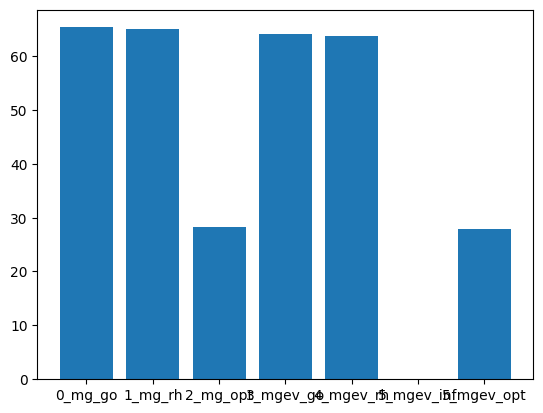

In [47]:
block = 'scenario'
key = 'lcoe_dis'
factor = 1e5

data = result_data.loc[(block, key), :] * factor
plt.bar(range(len(data)), data)
plt.xticks(range(len(data)), data.index)
plt.show

## Whatever else you want to plot